In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
word_embedding = {"hello": [0.1, 0.2, 0.3], "world": [0.4, 0.5, 0.6], "python": [0.7, 0.8, 0.9],"machine learning": [0.1, 0.2, 0.3]}

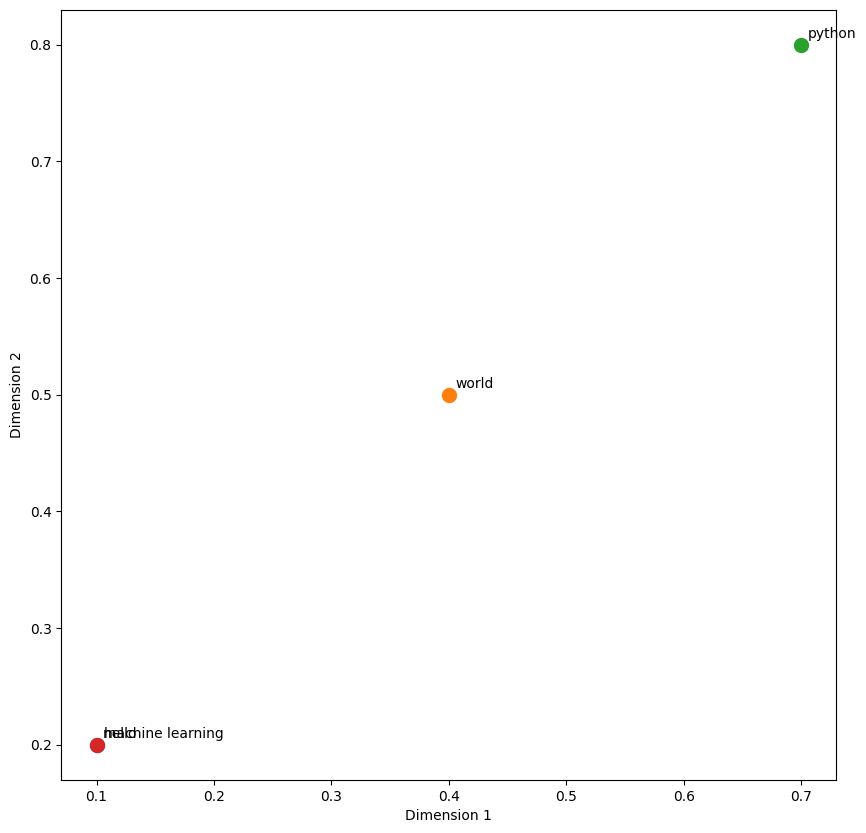

In [9]:
fig,ax=plt.subplots(figsize=(10,10))
for word,coords in word_embedding.items():
    ax.scatter(coords[0],coords[1],s=100)
    ax.annotate(word,(coords[0],coords[1]),xytext=(5,5),textcoords="offset points")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

    


In [15]:
def cosine_similarity(vec1, vec2):
    dot_product = sum(p*q for p,q in zip(vec1, vec2))
    magnitude=np.linalg.norm(vec1)*np.linalg.norm(vec2)
    if not magnitude:
        return 0
    return dot_product/magnitude

In [16]:
cat_vector=[0.7,0.2]
dog_vector=[0.6,0.2]
print(cosine_similarity(cat_vector,dog_vector))


0.9990561583550597


In [41]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

In [27]:
text="Hello, how are you?"
embedding = embeddings.embed_query(text)
print(embedding)
print(len(embedding))



[0.019096743315458298, 0.03446517512202263, 0.09162800759077072, 0.07016536593437195, -0.02994662895798683, -0.08419136703014374, 0.04581355303525925, 0.004958532750606537, -0.09189329296350479, 0.01740064099431038, -0.00881613977253437, -0.0006614484009332955, -0.028556954115629196, -0.021949661895632744, 0.055166732519865036, -0.049836475402116776, 0.08988089114427567, -0.08895707130432129, -0.1123562678694725, 0.0390004888176918, -0.0660707876086235, 0.026095176115632057, 0.036530736833810806, 0.06139037013053894, -0.05712493136525154, -0.05463936924934387, 0.030365560203790665, 0.03238752856850624, 0.012644639238715172, -0.1056857481598854, -0.0583454929292202, 0.06732939928770065, -0.040755897760391235, 0.006439779419451952, 0.005698710214346647, 0.05285320058465004, -0.039775311946868896, -0.11855240911245346, 0.0021161611657589674, -0.016692833974957466, 0.028338095173239708, -0.03743794187903404, -0.021371448412537575, -0.041475243866443634, 0.08497179299592972, -0.068694286048

In [28]:
sentences=["The car is red", "The sky is blue", "The car is fast","The coffee is hot"]

In [29]:
import numpy as np
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [36]:
from langchain.embeddings import HuggingFaceEmbeddings

model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

question_embd = model.embed_query("what is the colour of the sky?")

print(question_embd)
sentences_embed = model.embed_documents(sentences)
print(sentences_embed)



[0.03654153272509575, 0.044062696397304535, -0.022745775058865547, 0.01847468689084053, 0.015080397948622704, 0.0005565194878727198, 0.11241523921489716, -0.05433236435055733, 0.0964752659201622, 0.027100320905447006, -0.07718053460121155, -0.05291297286748886, -0.007927598431706429, -0.05438085272908211, -0.018351424485445023, 0.08236227929592133, 0.011420822702348232, -0.09204378724098206, -0.05166587233543396, -0.058798834681510925, -0.0627041682600975, 0.05511298030614853, -0.06964495778083801, 0.018832949921488762, -0.04714507237076759, 0.019620368257164955, -0.003893825691193342, -0.004051826894283295, 0.030603209510445595, -0.03708909824490547, -0.003884285455569625, 0.0434751957654953, 0.06333670020103455, 0.030966028571128845, -0.04055662825703621, -0.04136708006262779, 0.07257044315338135, -0.06492069363594055, -0.03156682476401329, 0.004041172098368406, -0.012937498278915882, -0.0446196049451828, -0.009770243428647518, 0.013186578638851643, -0.004833853803575039, 0.059657435

In [40]:
similarities = []

for i in range(len(sentences_embed)):
    sim = cosine_similarity(sentences_embed[i], question_embd)
    similarities.append((sentences[i], sim))   # keep sentence with score

# Sort once (highest similarity first)
similarities.sort(key=lambda x: x[1], reverse=True)

# Print results
for sent, score in similarities:
    print(f"{sent} → {score:.4f}")



    

The sky is blue → 0.6967
The car is red → 0.2290
The car is fast → 0.0902
The coffee is hot → 0.0881
